# Portfolio Optimization for Stocks in the Electric-Vehicle Industry
### *Yahoo! Finance, Pandas, Numpy, Matplotlib, and PyPortfolioOpt*
Mahika Calyanakoti

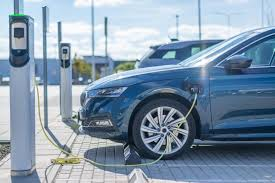

# Part 1: Introduction

In this project, I aim to optimize a portfolio of stocks within the electric vehicle sector, leveraging historical stock data and modern portfolio optimization techniques. The EV sector has seen a massive transformation over the past decade, shifting from a niche market to a major player in the global automotive industry. Driven by advances in technology, environmental concerns, and government policies/subsidies, the EV market has seen drastic growth. According to the International Energy Agency (IEA), global electric car stock surpassed 10 million in 2020, a significant increase from just 17,000 electric cars on the world’s roads in 2010. This rapid expansion presents both opportunities and challenges for investors who want to capitalize on the sector's potential while managing associated risks.

**I will focus on a selection of prominent EV-related stocks: **

Tesla (TSLA)
Ford (F)
ON Semiconductor (ON)
Li Auto (LI)
NIO Inc. (NIO)
General Motors (GM)
XPeng Inc. (XPEV)

These companies represent a mix of established automotive companies transitioning to electric products/services and also innovative startups in new technologies and market approaches.

Project Structure:

First, I'll collect historical stock price data for the selected companies over the past ten years using the yfinance library. This data will be used to calculate daily returns and assess the performance of a naively weighted portfolio. This initial step will provide a benchmark for comparison.

Next, I'll apply portfolio optimization techniques using the PyPortfolioOpt library. This involves calculating the expected returns and covariance matrix of the stock returns, which are crucial inputs for constructing an optimized portfolio. The optimization process will aim to maximize the [Sharpe ratio](https://www.investopedia.com/terms/s/sharperatio.asp), a measure of risk-adjusted return.

Finally, I'll visualize the performance of both the naive and optimized portfolios through cumulative return plots and compare key quantitative metrics, such as annualized return and volatility. This comparison will highlight the benefits of optimization and provide insights into the trade-offs between risk and return in the EV sector.

GOAL: This project will demonstrate how modern portfolio theory can be applied to improve investment strategies in the dynamic industry of electric vehicles.

SUMMARY OF RESULTS: With tools like the Sharpe ratio, Efficient Frontier, and Covariance Shrinkage, the optimized portfolio was able to increase returns from 21% to 28% (7% improvement) over the ten years, while decreasing volatility by 2%.

# Part 2: Installations and Importations

First, pip install the necessary libraries and packages (Yahoo! Finance, Pandas, Numpy, Matplotlib, and PyPortfolioOpt).

In [8]:
!sudo pip3 install --upgrade pip
!pip install yfinance pandas numpy matplotlib
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


Importing necessary libraries...

In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Here, I am importing key modules from the PyPortfolioOpt library, which provides tools for portfolio optimization. Specifically, I import the EfficientFrontier class for constructing optimized portfolios, DiscreteAllocation and get_latest_prices for converting fractional weights to actual asset allocations, and modules for calculating risk models and expected returns.

In [32]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import risk_models
from pypfopt import expected_returns

# Part 3: Initial Portfolio and Analysis

## Part 3.1: Build Naive Portfolio

Select the EV stocks described in the introduction.

In [12]:
# select a list of tickers
tickers = ['TSLA', 'F', 'ON', 'LI', 'NIO', 'GM', 'XPEV']

Next, I download the historical stock data for ~ 10 yeras using Yahoo! Finance.

In [15]:
# download historical stock data
start_date = '2014-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  7 of 7 completed


Print the data table to view the prices of each of the 7 stocks on each day since 2014 until now.

In [16]:
data

Ticker,F,GM,LI,NIO,ON,TSLA,XPEV
Date,,,,,,,
2014-01-02,9.181995,31.081705,NaN,NaN,8.010000,10.006667,NaN
2014-01-03,9.223625,30.034262,NaN,NaN,8.050000,9.970667,NaN
2014-01-06,9.265254,30.664236,NaN,NaN,8.030000,9.800000,NaN
2014-01-07,9.146316,30.512438,NaN,NaN,8.100000,9.957333,NaN
2014-01-08,9.241462,30.679413,NaN,NaN,8.540000,10.085333,NaN
...,...,...,...,...,...,...,...
2024-05-30,11.770000,43.410000,20.750000,5.40,72.110001,178.789993,8.66
2024-05-31,12.130000,44.990002,20.250000,5.39,73.040001,178.080002,8.31
2024-06-03,12.190000,45.740002,20.440001,5.34,73.190002,176.289993,8.12


## Part 3.2: Naive Portfolio Analysis

Calculate and display returns for each day based on the percent change of the stock price on adjacent days.

In [17]:
# calculate daily returns
returns = data.pct_change().dropna()

In [18]:
returns

Ticker,F,GM,LI,NIO,ON,TSLA,XPEV
Date,,,,,,,
2020-08-28,0.004342,0.011115,-0.091847,-0.069416,0.032818,-0.011323,0.073987
2020-08-31,-0.017291,-0.012991,-0.073864,0.028649,-0.029959,0.125689,-0.100483
2020-09-01,0.001466,0.005400,0.122086,0.057278,0.017782,-0.046697,0.054146
2020-09-02,0.017570,0.039275,-0.022963,-0.010934,0.028965,-0.058268,-0.024063
2020-09-03,-0.018705,-0.047804,-0.053721,-0.060301,-0.041555,-0.090238,-0.050261
...,...,...,...,...,...,...,...
2024-05-30,0.018166,0.018058,0.029266,0.095335,0.015491,0.014757,0.054811
2024-05-31,0.030586,0.036397,-0.024096,-0.001852,0.012897,-0.003971,-0.040416
2024-06-03,0.004946,0.016670,0.009383,-0.009276,0.002054,-0.010052,-0.022864


For our naive portfolio weighting, we simply assume equal investment in each stock.

In [25]:
# naive approach: equal weights
naive_weights = np.ones(len(tickers)) / len(tickers)
naive_weights

for i in range(len(tickers)):
  print(str(tickers[i]) + ": " + str(naive_weights[i] * 100) + "% of portfolio investment")

TSLA: 14.285714285714285% of portfolio investment
F: 14.285714285714285% of portfolio investment
ON: 14.285714285714285% of portfolio investment
LI: 14.285714285714285% of portfolio investment
NIO: 14.285714285714285% of portfolio investment
GM: 14.285714285714285% of portfolio investment
XPEV: 14.285714285714285% of portfolio investment


Based on 252 trading days, we find the return and volatility of the portfolio, utilizing the covariance metric as well.

In [29]:
# calculate portfolio returns & volatility for the naive approach
naive_portfolio_return = np.dot(naive_weights, returns.mean()) * 252
naive_portfolio_volatility = np.sqrt(np.dot(naive_weights.T, np.dot(returns.cov() * 252, naive_weights)))
print("Naive portfolio return: " + str(naive_portfolio_return * 100) + "% returns")
print("Naive portfolio volatility: " + str(naive_portfolio_volatility * 100) + "% risk")

Naive portfolio return: 21.601154715398557% returns
Naive portfolio volatility: 45.0398064259314% risk


## Part 3.3: Analysis and Summary

ANALYSIS: We can see from above that we have a 21.6% return with this naive portfolio, but very high volatility (45%). We will see how we can optimize this portfolio.

# Part 4: Optimizing the Portfolio

## Part 4.1 Building the New Portfolio

First, I use the `mean_historical_return` function and print that out to view the  stock growths over time. We then use `CovarianceShrinkage` to print a table showing the pairwise values between the 7 stocks.

NOTES:
* The covariance matrix is crucial as it quantifies how different asset returns move together. Accurately estimating this is essential for calculating portfolio risk/optimization.
* Shrinkage involves "shrinking" the sample covariance matrix towards a more structured target (identity matrix/average correlation matrix). This helps to reduce the estimation error, especially when dealing with a small sample size or highly volatile data.
* The Ledoit-Wolf shrinkage method is a specific shrinkage technique proposed by Olivier Ledoit and Michael Wolf. It provides an optimal shrinkage intensity that minimizes the mean-squared error/MSE between the estimated and the true covariance matrix.

In [34]:
# calculate expected returns and the covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.CovarianceShrinkage(data).ledoit_wolf()

In [35]:
mu

Ticker
F       0.026622
GM      0.037554
LI      0.053523
NIO    -0.038590
ON      0.239001
TSLA    0.316421
XPEV   -0.219584
dtype: float64

In [36]:
S

Ticker,F,GM,LI,NIO,ON,TSLA,XPEV
Ticker,,,,,,,
F,0.122280,0.088596,0.021572,0.051067,0.074251,0.059070,0.029768
GM,0.088596,0.122447,0.022027,0.056200,0.081217,0.061020,0.033744
LI,0.021572,0.022027,0.210903,0.146142,0.037644,0.056500,0.176281
NIO,0.051067,0.056200,0.146142,0.469378,0.087280,0.117553,0.189604
ON,0.074251,0.081217,0.037644,0.087280,0.219349,0.102394,0.052616
TSLA,0.059070,0.061020,0.056500,0.117553,0.102394,0.307906,0.075325
XPEV,0.029768,0.033744,0.176281,0.189604,0.052616,0.075325,0.298590


Next, the code optimizes for the Sharpe ratio, which involves the return of th portfolio, the risk-free rate, and the standard deviation of the portfolio's excess return.

In [37]:
# optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
optimized_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

We see the optimal ticker weights for each stock based on the above calculations printed below. Note that this suggests only investing in ON and TSLA.

In [45]:
cleaned_weights

OrderedDict([('F', 0.0),
             ('GM', 0.0),
             ('LI', 0.0),
             ('NIO', 0.0),
             ('ON', 0.46539),
             ('TSLA', 0.53461),
             ('XPEV', 0.0)])

## Part 4.2: Optimized Portfolio Analysis

Here, I calculate the returns and risk for the optimized portfolio. We see decreased volatility from 45% to 43% (2% decrease), and we also see a significant increase in returns from 21% to 28% returns.

In [47]:
# Calculate portfolio returns and volatility for the optimized approach
optimized_portfolio_return = ef.portfolio_performance()[0]
optimized_portfolio_volatility = ef.portfolio_performance()[1]
print("Optimized portfolio return: " + str(optimized_portfolio_return * 100) + "% returns")
print("Optimized portfolio volatility: " + str(optimized_portfolio_volatility * 100) + "% risk")

Optimized portfolio return: 28.039065005779456% returns
Optimized portfolio volatility: 43.1812947236823% risk


We can also note that the strategy suggests investing in ON with 46% of available capital, and into TSLA with more, at 53% of available capital.

# Part 5: Comparison of Results

## Part 5.1: Cumulative Returns of Both Portfolios

We can see that the optimized portfolio takes over the naive portfolio in produce higher cumulative returns, with a notable turning point at around October 2021.

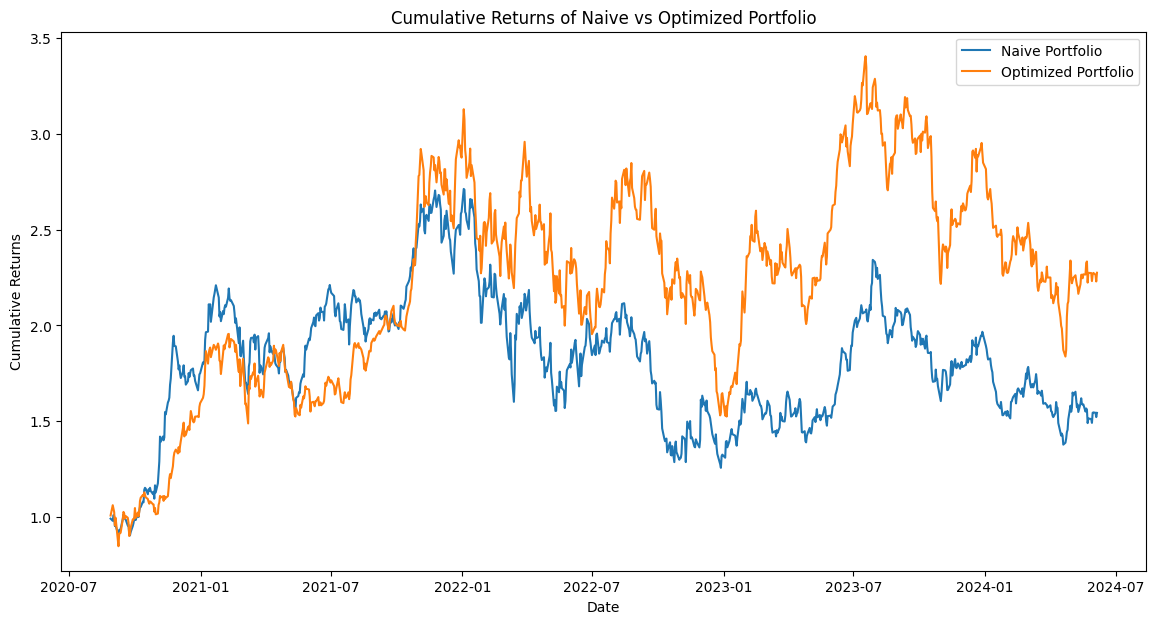

In [48]:
# Visualization
# plotting the cumulative returns of the naive and optimized portfolios
naive_cumulative_returns = (1 + returns.dot(naive_weights)).cumprod()
optimized_weights_array = np.array(list(cleaned_weights.values()))
optimized_cumulative_returns = (1 + returns.dot(optimized_weights_array)).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(naive_cumulative_returns, label='Naive Portfolio')
plt.plot(optimized_cumulative_returns, label='Optimized Portfolio')
plt.title('Cumulative Returns of Naive vs Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

## Part 5.2: Stock Prices Over Time

I plot the stock prices over time to visualize the stock trends in the past ten years. We see a very high boom in Tesla Prices, followed by ON, suggesting a justification for the optimized portfolio's choice of stocks.

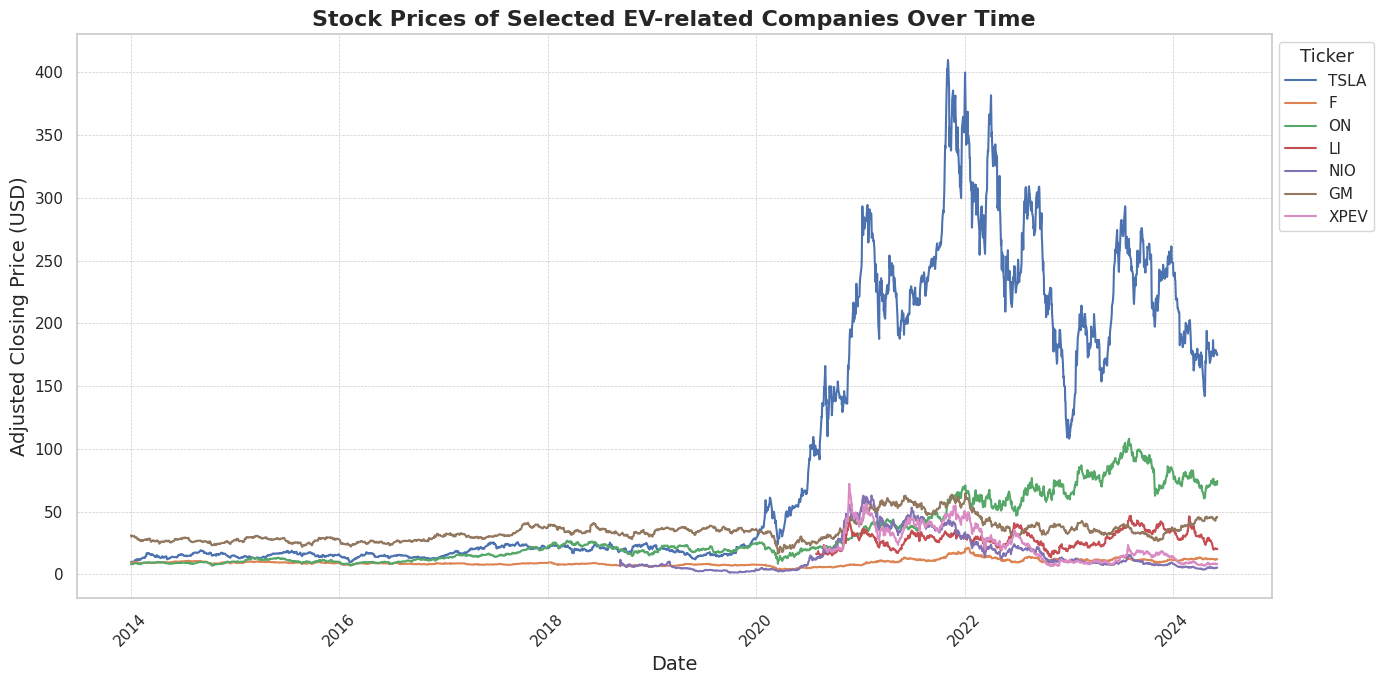

In [52]:
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))

# plot each stock price with a distinct color and label
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title('Stock Prices of Selected EV-related Companies Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Closing Price (USD)', fontsize=14)

# rotate x-axis labels
plt.xticks(rotation=45)

# legend
plt.legend(title='Ticker', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

## Part 5.3: Comparison of Quantitative Metrics (Return, Volatility)

Here, I simply allow for a side-by-side comparison on the returns and risk between the naive and optimized portfolios.

In [49]:
# display quantitative metrics
metrics = {
    'Naive Portfolio': {
        'Return': naive_portfolio_return,
        'Volatility': naive_portfolio_volatility
    },
    'Optimized Portfolio': {
        'Return': optimized_portfolio_return,
        'Volatility': optimized_portfolio_volatility
    }
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

            Naive Portfolio  Optimized Portfolio
Return             0.216012             0.280391
Volatility         0.450398             0.431813


## Part 5.4: Optimized Portfolio Distribution

This dataframe provides a summary of the distribution of investment suggested by the strategy.

In [50]:
# display the weights of the optimized portfolio
optimized_weights_df = pd.DataFrame.from_dict(cleaned_weights, orient='index', columns=['Weight'])
print(optimized_weights_df)

       Weight
F     0.00000
GM    0.00000
LI    0.00000
NIO   0.00000
ON    0.46539
TSLA  0.53461
XPEV  0.00000


## Part 5.5 Discrete Allocation

I now determine how much to buy of each stock based on an allocation of capital for the invesment. Say we allocate $10,000. Then the portfolio will include the following number of each stock. `DiscreteAllocation` allows us to determine these numbers.

In [56]:
# get the latest prices
latest_prices = get_latest_prices(data)

# discrete allocation of $10,000 investment
portfolio_value = 10000
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=portfolio_value)
allocation, leftover = da.lp_portfolio()

# display allocation
allocation_df = pd.DataFrame.from_dict(allocation, orient='index', columns=['Shares'])
print("Discrete Allocation (Number of Shares):")
print(allocation_df)
print(f"Leftover: ${leftover:.2f}")

Discrete Allocation (Number of Shares):
      Shares
F          1
NIO        2
ON        63
TSLA      30
XPEV       1
Leftover: $23.02


This dataframe provides a more detailed view of not only the number of stocks for each company, but also the amount invested in each company (based on the stock price).

In [57]:
# dataframe for the allocation details
allocation_df['Latest Price'] = latest_prices[allocation_df.index]
allocation_df['Total Cost'] = allocation_df['Shares'] * allocation_df['Latest Price']
allocation_df = allocation_df.reset_index().rename(columns={'index': 'Ticker'})

print("Discrete Allocation Details:")
print(allocation_df)

Discrete Allocation Details:
  Ticker  Shares  Latest Price   Total Cost
0      F       1     12.070000    12.070000
1    NIO       2      5.270000    10.540000
2     ON      63     74.540001  4696.020058
3   TSLA      30    175.000000  5250.000000
4   XPEV       1      8.350000     8.350000


This bar chart shows the allocation of funds for investing into each company.

<Figure size 1000x600 with 0 Axes>

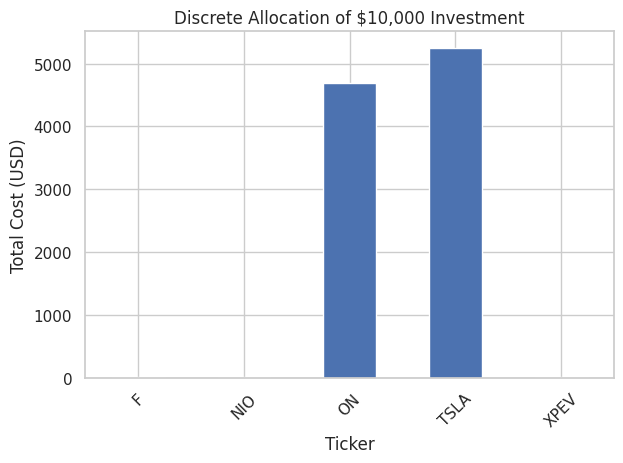

In [58]:
# seeing the allocation as a bar chart
plt.figure(figsize=(10, 6))
allocation_df.plot(kind='bar', x='Ticker', y='Total Cost', legend=False)
plt.title('Discrete Allocation of $10,000 Investment')
plt.xlabel('Ticker')
plt.ylabel('Total Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 6: Conclusions

We can see from the optimized portfolio that the vast majority of funds are allocated towards TSLA, and then ON, improving returns by 7% (from 21% to 28%) and decreasing volatility by 2% (from 45% to 43%). It is interesting to note the drastic drop in Tesla's market capitalization since 2022. Here's an [explanation](https://www.statista.com/chart/29002/tesla-market-capitalization/) for this: "Tesla was always valued as a high-growth stock, meaning much of its valuation was based on its future potential. As the economic outlook darkened throughout 2022, so did Tesla’s potential for future growth, especially considering that inflation and high interest rates will eventually affect consumer spending on big-ticket items such as cars."

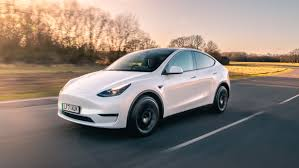